# LIBRARIES

In [1]:
# Custom imports
from functions import best_features_set

import os
import glob
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# READ FILES

In [2]:
X_test = pd.read_csv('../dataset/X_test.csv', index_col=0)
y_test = pd.read_csv('../dataset/y_test.csv', index_col=0)

# READ MODELS

In [3]:
# Initialize the dictionary
models = {}

# Set the main folder path containing the model files
main_folder = '../models/'

# List all files in the main directory
files = os.listdir(main_folder)

# Iterate over the files in the directory
for file in files:
    file_path = os.path.join(main_folder, file)
    
    # Extract the model name from the file name
    model_name = os.path.splitext(file)[0]
    
    # Add the model to the dictionary with the model name
    models[model_name] = joblib.load(file_path)

# GENERALIZATION

The confusion matrix is a table that summarizes the performance of a binary classification model by showing the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions on the test set.

In [4]:
from sklearn.metrics import classification_report

for model_name in models: 
    features = models[model_name].feature_names_in_
    y_pred = models[model_name].predict(X_test.loc[:,features])
    report = classification_report(y_test, y_pred)
    print(f"Relatório de Classificação: {model_name}\n", report)

Relatório de Classificação: NB
               precision    recall  f1-score   support

       False       0.94      0.88      0.91        33
        True       0.71      0.83      0.77        12

    accuracy                           0.87        45
   macro avg       0.82      0.86      0.84        45
weighted avg       0.88      0.87      0.87        45

Relatório de Classificação: GB
               precision    recall  f1-score   support

       False       0.94      0.91      0.92        33
        True       0.77      0.83      0.80        12

    accuracy                           0.89        45
   macro avg       0.85      0.87      0.86        45
weighted avg       0.89      0.89      0.89        45

Relatório de Classificação: DT
               precision    recall  f1-score   support

       False       0.87      0.79      0.83        33
        True       0.53      0.67      0.59        12

    accuracy                           0.76        45
   macro avg       0.70      0.7

## Confusion Matrix

In [5]:
def plot_confusion_matrix(model_name):      
    
    # Select the model
    model = models[model_name]
    
    features = models[model_name].feature_names_in_
    
    # Make predictions on the test set
    y_pred = model.predict(X_test.loc[:,features])

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)      
       
    # Define custom labels
    labels = ['Survive', 'Death']

    # Plot the heatmap
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Real')
    plt.title(f'Heatmap of Confusion Matrix - {model_name}')
    
    # Save the figure
    plt.savefig(f'../images/confusion_matrix_{model_name}.png')
    
    # Show the plot
    plt.show()

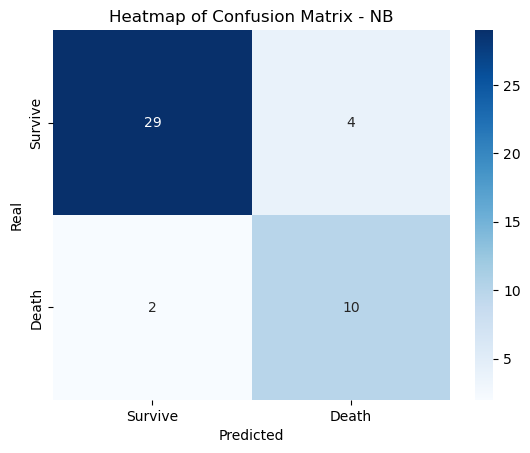

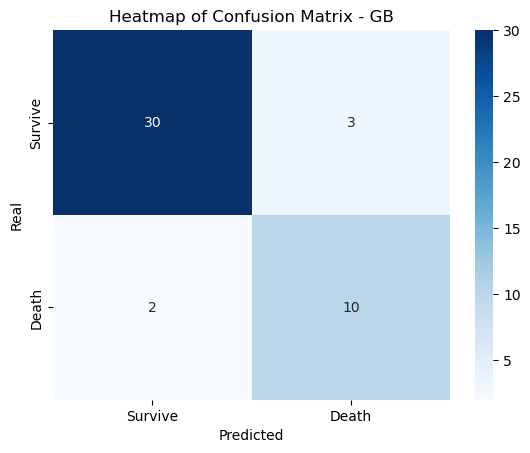

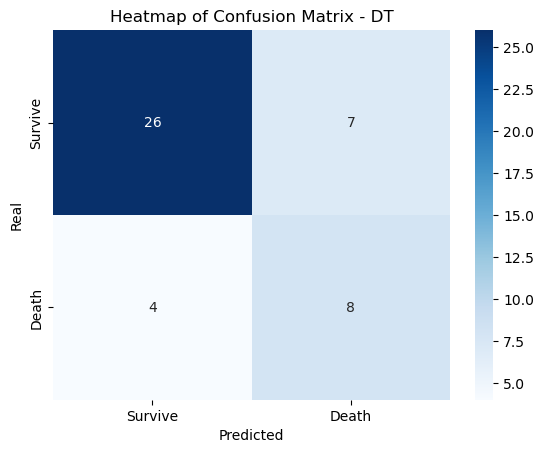

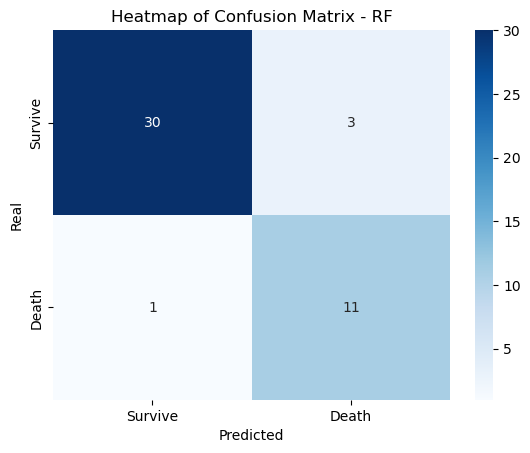

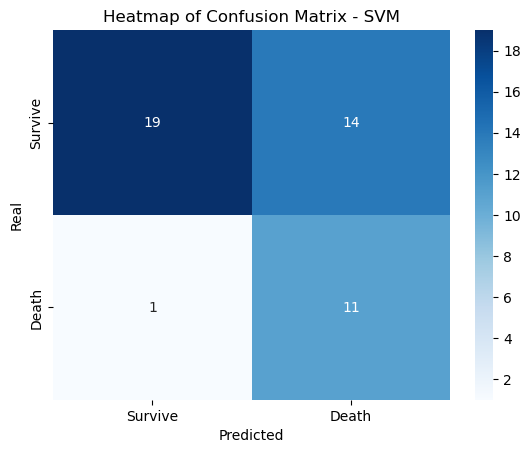

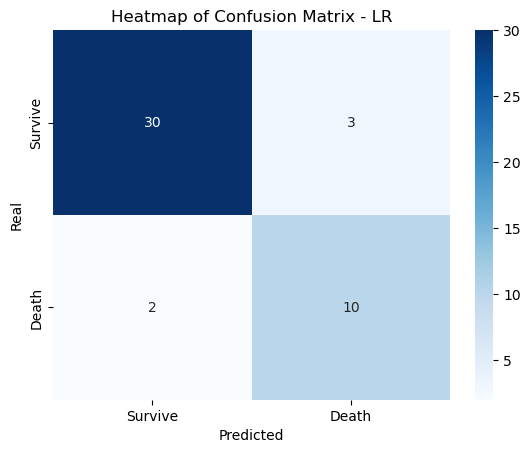

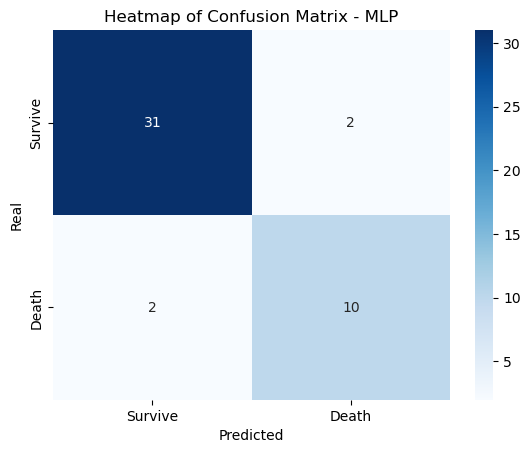

In [6]:
for model_name in models:
    plot_confusion_matrix(model_name)

## ROC

In [7]:
def plot_roc_curve(model_name):
       
    model = models[model_name] 
        
    features = models[model_name].feature_names_in_
        
    probs = model.predict_proba(X_test.loc[:,features])[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC={auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC Curve - ' + model_name)
    plt.show()

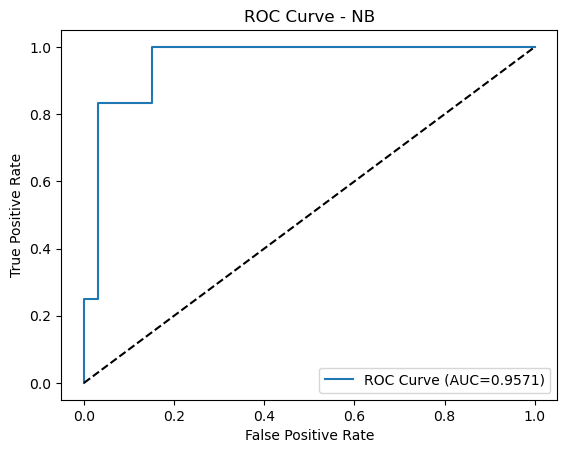

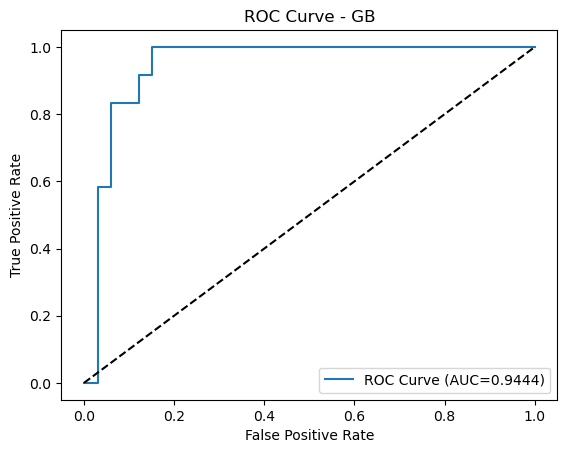

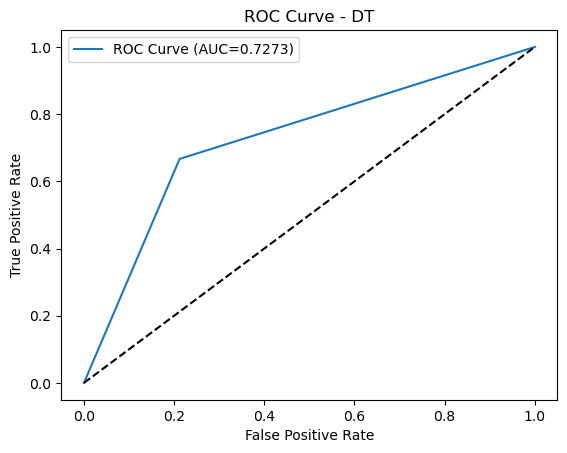

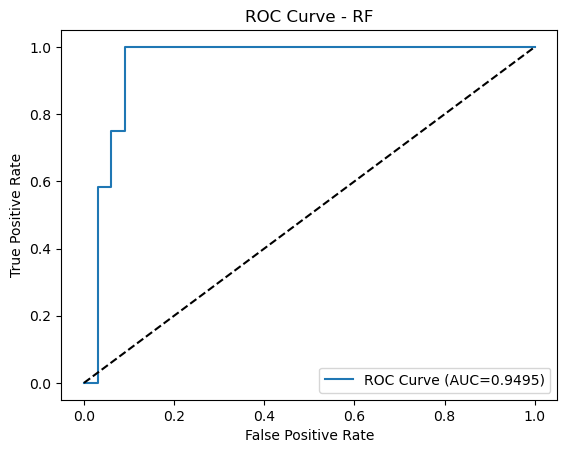

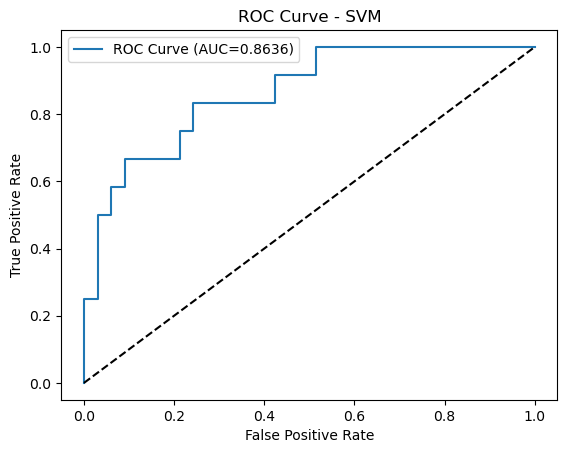

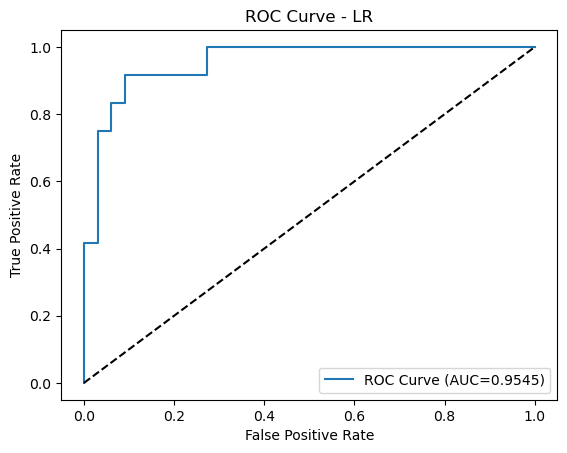

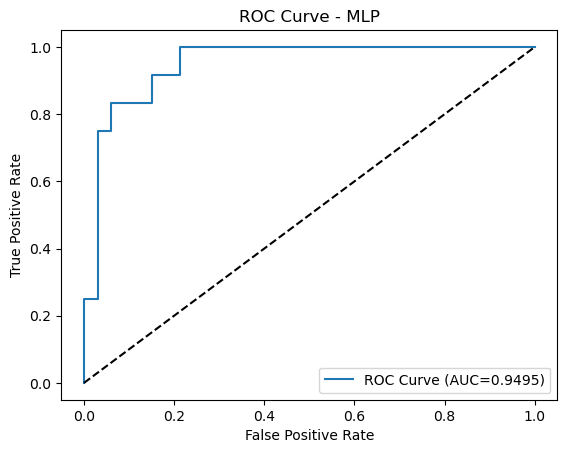

In [8]:
for model_name in models:
    plot_roc_curve(model_name)